Let's first setup our imports

In [1]:
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from sklearn.datasets import load_iris

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
dataset = load_iris()
data =  pd.DataFrame(dataset.data, columns = dataset.feature_names)
target =  pd.Series(dataset.target)#, columns = dataset.target_names)

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [3]:
data = data.apply(preprocessing.scale)

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

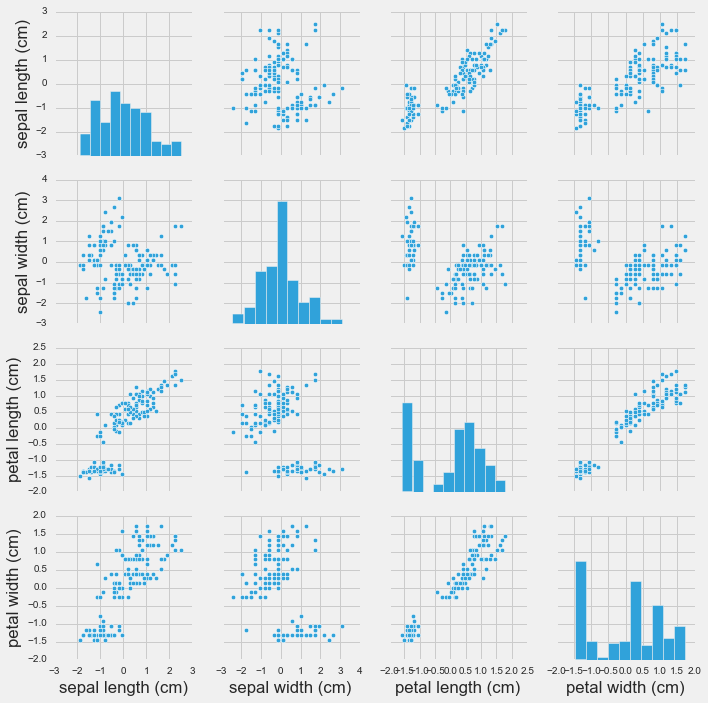

In [4]:
sns.pairplot(data)
sns.plt.show()

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [44]:
X = data[["petal width (cm)", "sepal width (cm)"]]
y = target

kmean_cluster = cluster.KMeans(n_clusters = 3, n_init = 20)
kmean_cluster.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [45]:
labels = kmean_cluster.labels_
centroids = kmean_cluster.cluster_centers_

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

In [46]:
results = pd.DataFrame(data = [labels, target], index = ["predicted", "actual"]).T
results['difference'] = results['predicted'] - results['actual']
colored_error = results[results['difference'] != 0]['difference'].abs().map({1: 'b', 2: 'r'})
error_size = results['difference'].abs().map({0: 0, 1: 100, 2: 100})

Plot the clusters

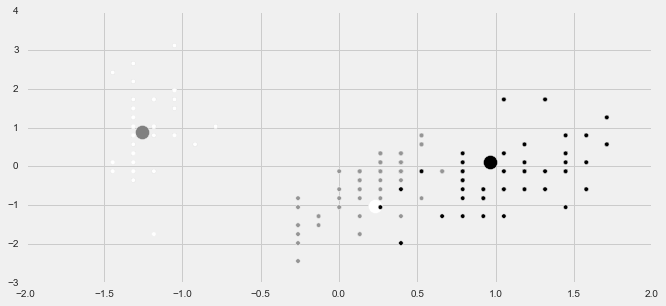

In [50]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(111)
ax2 = plt.subplot(211)

ax1 = sns.plt.scatter(x = "petal width (cm)", y = "sepal width (cm)", c = labels, data = X, s = 20)
sns.plt.scatter(centroids[0][0], centroids[0][1],  c = 'white', s = 200)
sns.plt.scatter(centroids[1][0], centroids[1][1],  c = 'grey', s = 200)
sns.plt.scatter(centroids[2][0], centroids[2][1],  c = 'black', s = 200)
# sns.plt.scatter(x = "petal width (cm)", y = "sepal width (cm)", c = colored_error, data = X, s = error_size, facecolors = 'none')

ax2 = sns.plt.scatter(x = "petal width (cm)", y = "sepal width (cm)", c = target, data = data)
sns.plt.show()


Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

In [34]:
centroids

array([[ 0.96504531,  0.11979554],
       [-1.25663117,  0.89510445],
       [ 0.23250145, -1.0222344 ]])

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

In [35]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.46042515366515224

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis